# R squared intuition

R squared - we sum of squared sums distances to regression line - SSres.

R^2 = 1 - SSres / SStot

SStot the distance to a simple horizontal line.

How good is our line compared to a simple average?

# Adjusted R^2

R^2 - greater is better. We want to get it close to one.

But what happens if we just pile up complexity in our model? R^2 will never decrease.

What it does is adjusting for number of regressions.

# Evaluating model performance

How to know whether we should have kept a particular variable?

Follow rules, but trace for instance adjusted R squared. Is it growing?

# Interpreting linear regression coefficients

If sign is positive - then we have a positive correlation. Magnitude is tricky here though as they tightly depend on scale of variables.

# Wrap

## Pros and cons with each model

* Linear regression
  * Works on any size and gives information about relevance of features, but relies on linear regression assumptions
* Polynomial regression
  * Works on any size, works well for non linear
  * Need right polynomial degree
* SVR
  * Easily adaptable and works well on non linear, and is not biased by outliers
  * Compulsory scaling, less known, difficult to understand
* Decision tree
  * Easy to interpret, no scaling needed, works on both linear and non-linear
  * Poor in small, overfitting can occur
* Random forest
  * Powerful and accurate, good performance for many including linear
  * No interpretability, overfitting can occur, need to choose number of trees

## Choosing model

* Is data linear? Or not?
* If it is
  * Simple linear
  * Multiple linear if we have many features
* If not
  * Polynomial regression
  * SVR
  * Decision tree
  * Random forest
* How to choose? k-Fold cross validation.

## How to improve?

* Tune parameters
* Regular
  * Coefficients in linear regression
  * Hyperparameters - Not learned, but fixed inside equations, like regularization or penalty

# Classification

Instead of predicting continuous number we use classification to predict a category.

Available classifiers:

* Logistic regression (linear)
* SVM (linear)
* K-NN (non-linear)
* Kernel SVM (non-linear)
* Random forests (non-linear)
* Naive Bayes

## Logistic regression

Hard to model 0/1 category approach here. Instead we can do probability model. Percentage change of picking one choice or another.

Sigmoid function. Smoothen out things.

Convert to prediction: Put in fixed line. If below - predicted 0. If above - predicted 1.

# Exercises

In [1]:
library(tidyverse)
#source("~/src/JupyterRReuse/VisualizationUtils.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
dataset <- read.csv("data/Logistic_Regression/Social_Network_Ads.csv")
glimpse(dataset)

Observations: 400
Variables: 5
$ User.ID         <int> 15624510, 15810944, 15668575, 15603246, 15804002, 1...
$ Gender          <fct> Male, Male, Female, Female, Male, Male, Female, Fem...
$ Age             <int> 19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20,...
$ EstimatedSalary <int> 19000, 20000, 43000, 57000, 76000, 58000, 84000, 15...
$ Purchased       <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...


In [3]:
table(dataset$Purchased)


  0   1 
257 143 

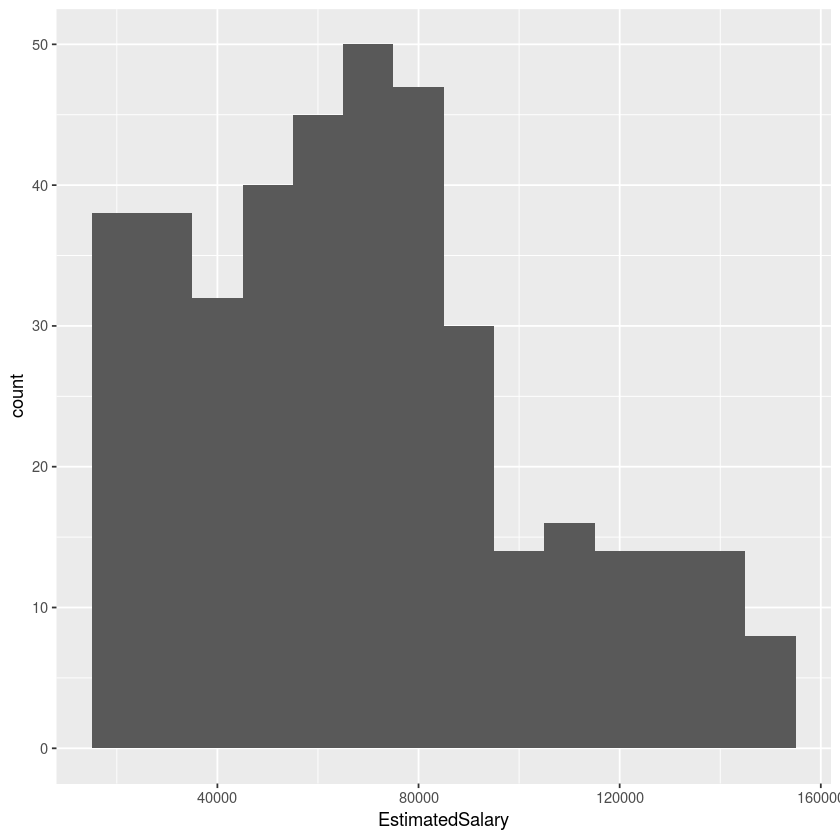

In [5]:
# vu$pltsize(5, 5)
ggplot(dataset, aes(EstimatedSalary)) + geom_histogram(binwidth = 10000)

## Prepare training set

In [7]:
library(caTools)
set.seed(123)
split <- sample.split(dataset$Purchased, SplitRatio = 0.75)
training_set <- subset(dataset[, 3:5], split==T)
test_set <- subset(dataset[, 3:5], split==F)

# Feature scaling
training_set[, 1:2] <- scale(training_set[, 1:2])
test_set[, 1:2] <- scale(test_set[, 1:2])

head(test_set)

,Age,EstimatedSalary,Purchased
2,-0.3041906,-1.5135434,0
4,-1.0599437,-0.3245603,0
5,-1.8156969,0.2859986,0
9,-1.2488820,-1.0957926,0
12,-1.1544129,-0.4852337,0
18,0.6405008,-1.3207353,1


## Fit logistic regression

Generalized linear models (which logistic model is).


In [8]:
classifier <- glm(formula = Purchased ~ ., 
                  family=binomial, 
                  data=training_set)
summary(classifier)


Call:
glm(formula = Purchased ~ ., family = binomial, data = training_set)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0753  -0.5235  -0.1161   0.3224   2.3977  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -1.1923     0.2018  -5.908 3.47e-09 ***
Age               2.6324     0.3461   7.606 2.83e-14 ***
EstimatedSalary   1.3947     0.2326   5.996 2.03e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 390.89  on 299  degrees of freedom
Residual deviance: 199.78  on 297  degrees of freedom
AIC: 205.78

Number of Fisher Scoring iterations: 6


## Predicting

In [9]:
prob_pred <- predict(classifier, type='response', newdata=test_set[-3])
y_pred <- ifelse(prob_pred > 0.5, 1, 0)
head(cbind(test_set, prob_pred, y_pred), 10)

,Age,EstimatedSalary,Purchased,prob_pred,y_pred
2,-0.3041906,-1.5135434,0,0.016239538,0
4,-1.0599437,-0.3245603,0,0.011714838,0
5,-1.8156969,0.2859986,0,0.003784646,0
9,-1.2488820,-1.0957926,0,0.002452746,0
12,-1.1544129,-0.4852337,0,0.007333944,0
18,0.6405008,-1.3207353,1,0.206157658,0
19,0.7349699,-1.2564660,1,0.266993507,0
20,0.9239082,-1.2243313,1,0.385147569,0
22,0.8294390,-0.5816377,1,0.544857878,1
29,-0.8710055,-0.7744458,0,0.010300564,0


## Making confusion matrix

Shows how predicted, and actual outcome.

In [10]:
cm <- table(test_set[, 3], y_pred)
cm

   y_pred
     0  1
  0 57  7
  1 10 26

Age,EstimatedSalary
-2.861155,-2.587502
-2.851155,-2.587502
-2.841155,-2.587502
-2.831155,-2.587502
-2.821155,-2.587502
-2.811155,-2.587502


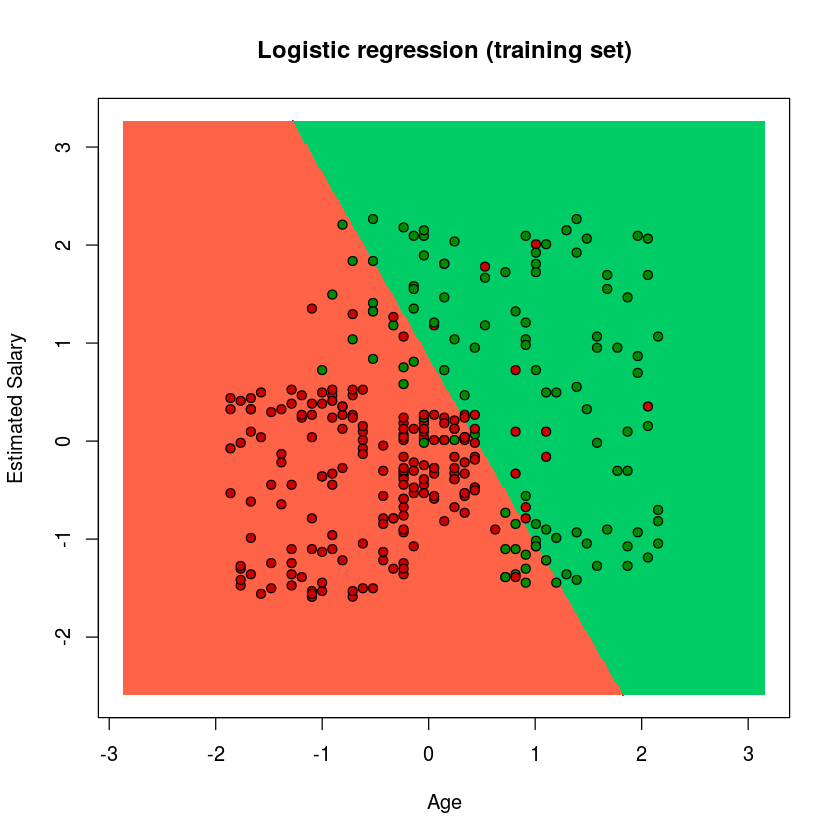

In [12]:
library(ElemStatLearn)
set <- training_set
X1 <- seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 <- seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set <- expand.grid(X1, X2)
colnames(grid_set) <- c('Age', 'EstimatedSalary')
head(grid_set)
prob_set <- predict(classifier, type='response', newdata=grid_set)
y_grid <- ifelse(prob_set > 0.5, 1, 0)
plot(set[, -3],
    main='Logistic regression (training set)',
    xlab='Age',
    ylab='Estimated Salary',
    xlim=range(X1),
    ylim=range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add=TRUE)
points(grid_set, pch='.', col=ifelse(y_grid==1, 'springgreen3', 'tomato'))
points(set, pch=21, bg=ifelse(set[, 3] == 1, 'green4', 'red3'))

In [38]:
visualize_classification <- function(set, classifier, title, scale_probset=1) {

    X1 <- seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
    X2 <- seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
    grid_set <- expand.grid(X1, X2)    
    colnames(grid_set) <- c('Age', 'EstimatedSalary')
    
    prob_set <- as.numeric(predict(classifier, type='response', newdata=grid_set)) / scale_probset    
    y_grid <- ifelse(prob_set > 0.5, 1, 0)
    plot(set[, -3],
        main=paste(title, '(test set)'),
        xlab='Age',
        ylab='Estimated Salary',
        xlim=range(X1),
        ylim=range(X2))
    contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add=TRUE)
    points(grid_set, pch='.', col=ifelse(y_grid==1, 'springgreen3', 'tomato'))
    points(set, pch=21, bg=ifelse(set[, 3] == 1, 'green4', 'red3'))
}


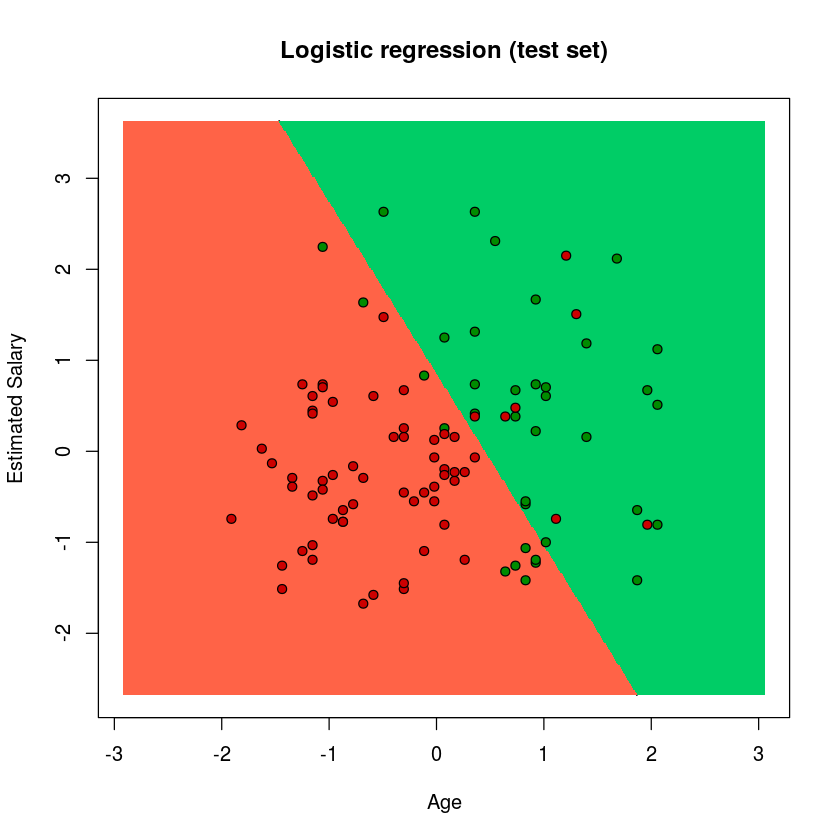

In [28]:
visualize_classification(test_set, classifier, 'Logistic regression')

# K nearest neighbors

Clustering before:

* How to handle dots not falling within a clear cluster?

How to do it:

* Step 1: Choose number of K neighbors
* Step 2: Take the K nearest neighbors of the new datapoint
* Step 3: Among the K neighbors, how many entries in each?
* Step 4: Assign data point to category where you counted the most neighbors

Distance measure: Starting out with euclidian distance. Count the closest neighbors. Go to the category with most neighbors.

## Exercise

In [14]:
library(class)

In [15]:
glimpse(dataset)

Observations: 400
Variables: 5
$ User.ID         <int> 15624510, 15810944, 15668575, 15603246, 15804002, 1...
$ Gender          <fct> Male, Male, Female, Female, Male, Male, Female, Fem...
$ Age             <int> 19, 35, 26, 27, 19, 27, 27, 32, 25, 35, 26, 26, 20,...
$ EstimatedSalary <int> 19000, 20000, 43000, 57000, 76000, 58000, 84000, 15...
$ Purchased       <int> 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...


In [16]:
glimpse(training_set)
glimpse(test_set)

Observations: 300
Variables: 3
$ Age             <dbl> -1.7655475, -1.0962966, -1.0006894, -1.0006894, -0....
$ EstimatedSalary <dbl> -1.47334137, -0.78837605, -0.36027273, 0.38177303, ...
$ Purchased       <int> 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, ...
Observations: 100
Variables: 3
$ Age             <dbl> -0.30419063, -1.05994374, -1.81569686, -1.24888202,...
$ EstimatedSalary <dbl> -1.5135434, -0.3245603, 0.2859986, -1.0957926, -0.4...
$ Purchased       <int> 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...


In [19]:
y_pred = knn(train=training_set[, -3], 
             test=test_set[, -3], 
             cl=training_set[, 3],
             k=5
)
head(y_pred)

table(test_set[, 3], y_pred)

[1] 0 0 0 0 0 1
Levels: 0 1

   y_pred
     0  1
  0 59  5
  1  6 30

Age,EstimatedSalary
-2.910166,-2.674217
-2.900166,-2.674217
-2.890166,-2.674217
-2.880166,-2.674217
-2.870166,-2.674217
-2.860166,-2.674217


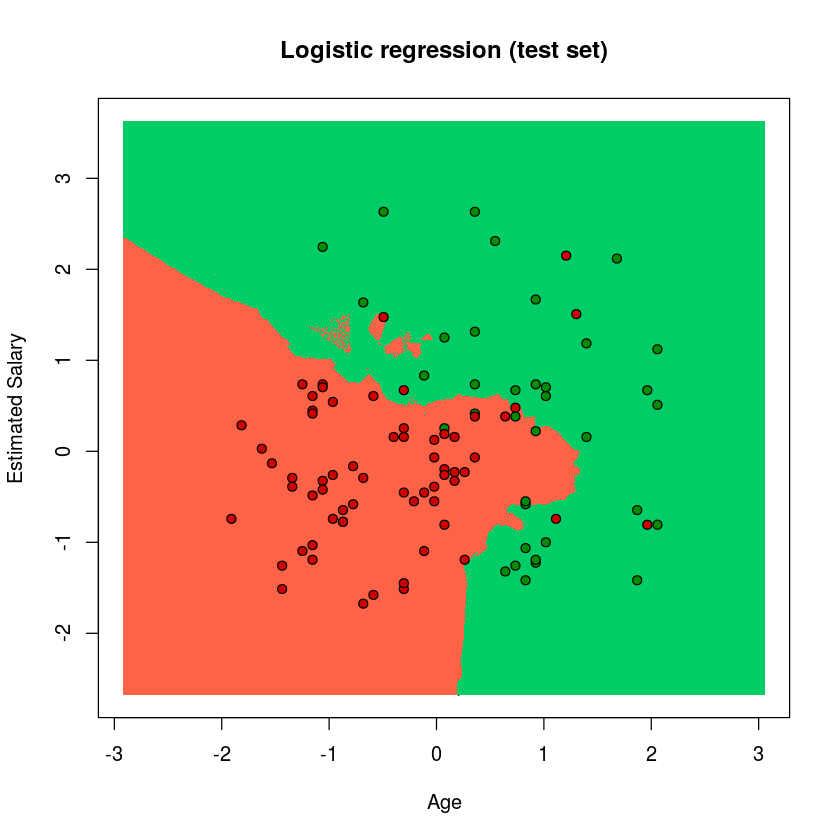

In [21]:
# Setup grid
set <- test_set
X1 <- seq(min(set[, 1]) - 1, max(set[, 1]) + 1, by = 0.01)
X2 <- seq(min(set[, 2]) - 1, max(set[, 2]) + 1, by = 0.01)
grid_set <- expand.grid(X1, X2)
colnames(grid_set) <- c('Age', 'EstimatedSalary')
head(grid_set)

# Prepare classifier
# prob_set <- predict(classifier, type='response', newdata=grid_set)
y_grid <- knn(train=training_set[, -3], 
             test=grid_set, 
             cl=training_set[, 3],
             k=5
)

# Visualize
plot(set[, -3],
    main='Logistic regression (test set)',
    xlab='Age',
    ylab='Estimated Salary',
    xlim=range(X1),
    ylim=range(X2))
contour(X1, X2, matrix(as.numeric(y_grid), length(X1), length(X2)), add=TRUE)
points(grid_set, pch='.', col=ifelse(y_grid==1, 'springgreen3', 'tomato'))
points(set, pch=21, bg=ifelse(set[, 3] == 1, 'green4', 'red3'))

## Thinking points

* We need to specify number of neighbors
* Not a linear classifier!

# SVM intuition

A bit different from other machine learning algorithms.

How do we separate two groups of points? How do we separate two groups *as well as possible*? We try finding line of 'maximum margin'.

The datapoints becomes *vectors* *supporting* the *vector machine*. Kind of. We end up with a maximum margin.

Intuition: Linearly separable dataset.

## Why is it special?

* Normally: Finding very apply apple or orangy orange and try building classifications from that.
* In SVM: Looking at apples very much like apples and vice verse. The support vectors - very close to decision boundary.

## Implementation

   y_pred
     0  1
  0 57  7
  1 13 23

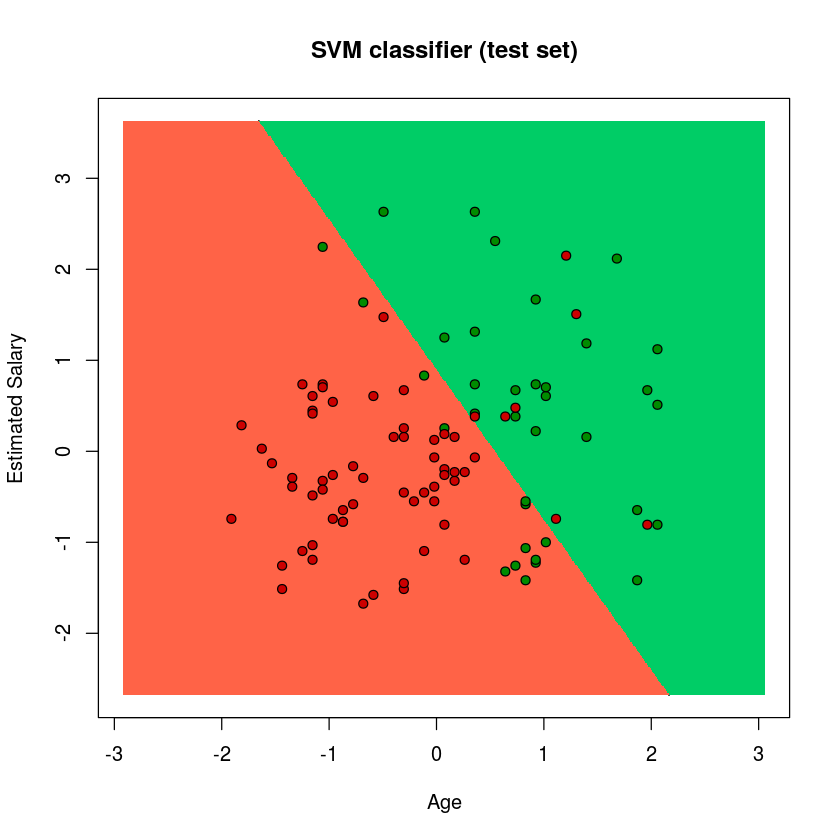

In [39]:
library(e1071)

svm_classifier <- svm(formula = Purchased ~ .,
                      data = training_set,
                      type = 'C-classification',
                      kernel = 'linear')

y_pred <- predict(svm_classifier, newdata=test_set[-3])
cm <- table(test_set[, 3], y_pred)
cm
# head(y_pred)

visualize_classification(test_set, svm_classifier, 'SVM classifier', scale_probset=2)

# Kernel SVM

When we cannot find a boundary? In some cases: Not linearly separable!

Higher dimensional space:

* Can be non-separable in one dimension
* We can add mapping functions - for instance by adding quadratic function then the data can be separated (beautiful)
* Example: Mapping to 3D space (when initially surrounded). Then inserting a hyperplane.
* Higher dimensions: Can be computer intensive

Kernel trick:

* The Gaussian kernel for instance
* Function putting in 'landmark' in particular position
* Could for instance use two kernel functions lifting two areas

Types of kernel functions:

* Radial basis kernel function (normal distribution)
* Sigmoid kernel (also landmark, but kind of plateau shift)
* Polynomial kernel

   y_pred
     0  1
  0 58  6
  1  4 32

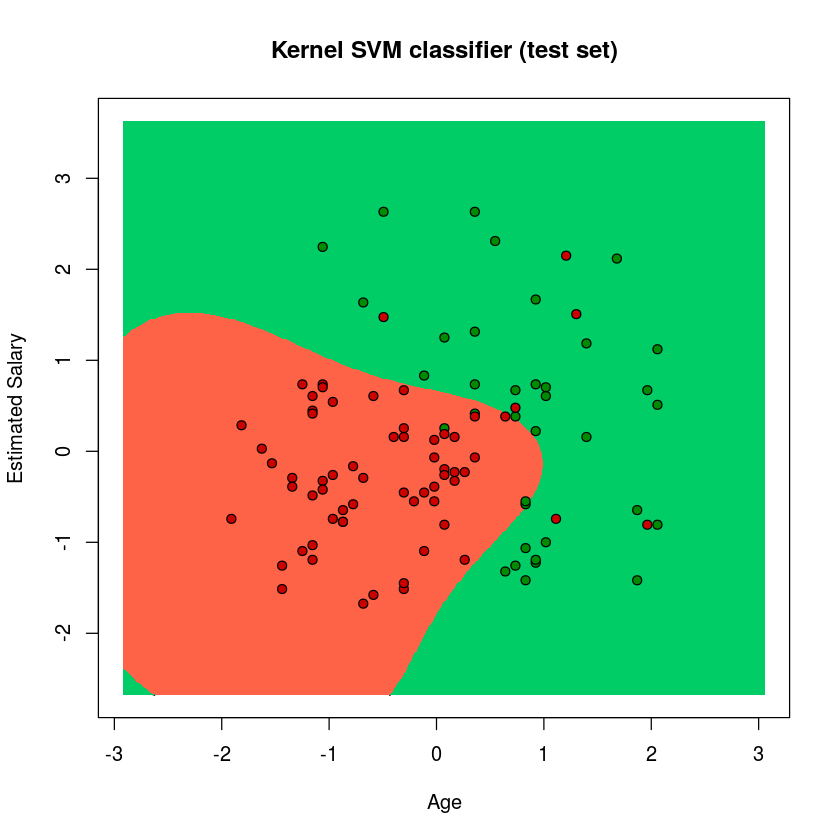

In [45]:
library(e1071)

# Type: Regression or classification
# Kernel: The kernel approach we want to use
svm_classifier <- svm(formula = Purchased ~ .,
                      data = training_set,
                      type = 'C-classification',
                      kernel = 'radial')

y_pred <- predict(svm_classifier, newdata=test_set[-3])
cm <- table(test_set[, 3], y_pred)
cm

visualize_classification(test_set, svm_classifier, 'Kernel SVM classifier', scale_probset=2)